In [2]:
pip install PyAstronomy

     |████████████████████████████████| 716kB 5.4MB/s 
  Created wheel for PyAstronomy: filename=PyAstronomy-0.16.0-cp37-none-any.whl size=504499 sha256=9e2f9bfe3134ed7b2f2068c2f0a3143712a05ae93801e5aae385a910cf5a634b
  Stored in directory: /root/.cache/pip/wheels/93/af/aa/931d34dfc98c7f7fb4514fb9da32cac3584895cc03e873bdd1
Successfully built PyAstronomy


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp
from mpl_toolkits.mplot3d import Axes3D
from google.colab import files
import io
from PyAstronomy import pyasl
import time
r = pyasl.BallesterosBV_T()
b = pyasl.Ramirez2005()

uploaded = files.upload()

data0 = data = np.array(pd.read_csv(io.BytesIO(uploaded['SItable1.csv'])))

Saving SItable1.csv to SItable1.csv


In [4]:

pd.read_csv(io.BytesIO(uploaded['SItable1.csv']))
#tolist makes array to list to remove 'dtype=float64' from the end of the array
te = data0[:,2].tolist()
tee= data0[:,3].tolist()
age = data0[:,4].tolist()
agle = data0[:,5].tolist()
ague = data0[:,6].tolist()
mass = data0[:,7].tolist()
massle = data0[:,8].tolist()
massue = data0[:,9].tolist()
p = data0[:,21].tolist()
pl = data0[:,22].tolist()
pu = data0[:,23].tolist()
data = np.array([te, p, age, mass]).T

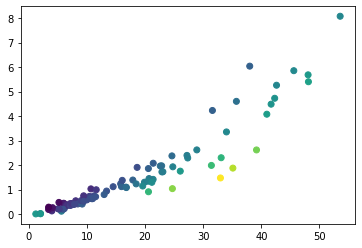

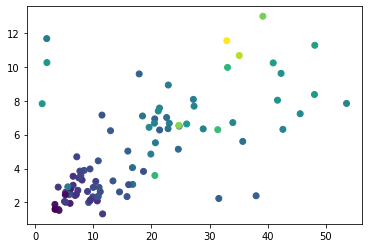

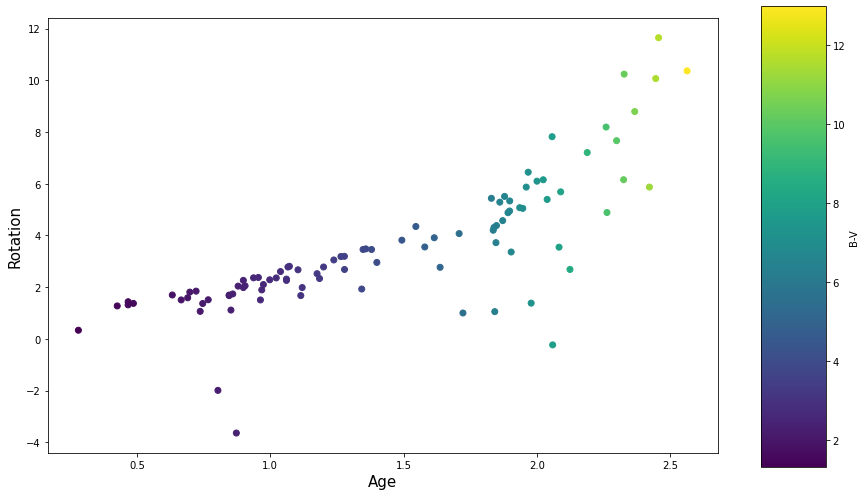

In [6]:
data = np.array([te, p, age, mass]).T
a = 0.5189
b=0.75
c=0.4
d=0.601
X1 = np.log(data[:,2]) #age
X2 = r.t2bv(data[:,0])#data[::al,2] #B_V
X3 = data[:, 3] #mass
x = mean_fn(np.log(data[:,1]), X2, a, b, c, d)
plt.scatter(p, x, c=X2, cmap='viridis')
plt.show()
plt.scatter(p, age, c=X2, cmap='viridis')
subtract = data[:,2]-x
plt.show()
fig = plt.figure(figsize=(12, 8))
plt.scatter(X1, subtract, c=data[:,2], cmap='viridis')
plt.xlabel('Age', size=15)
plt.ylabel('Rotation', size=15)
#plt.subplots_adjust(bottom=np.min(X2), top=np.max(X2))
cax = plt.axes([0.95, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax, label='B-V')
plt.show()

In [10]:
 a = tf.Variable( 0.5189)
 b =  tf.Variable(0.75)
 c =  tf.Variable(0.4)
 d =  tf.Variable(0.601)

In [32]:
mean_fn = lambda: np.array(age) - np.array(p)**(1/a) * b*(r.t2bv(np.array(te)) - c)**(-d/a)

In [34]:
tfp.math.minimize(mean_fn, num_steps=1000, optimizer=tf.optimizers.Adam(learning_rate=0.1), trainable_variables=[a,b,c,d])
print(a, b, c, d)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan> <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=nan>
